In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
df = pd.read_csv('Medical_Cost.csv')  
df.head(10)
       
#sns.jointplot(x=Age['age'],y=Medical Cost per region['Medical Cost per region'])


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [70]:
df.describe()

count      1338
unique        2
top       False
freq       1276
dtype: object

In [71]:
df.isnull().sum()

0

In [82]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [83]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


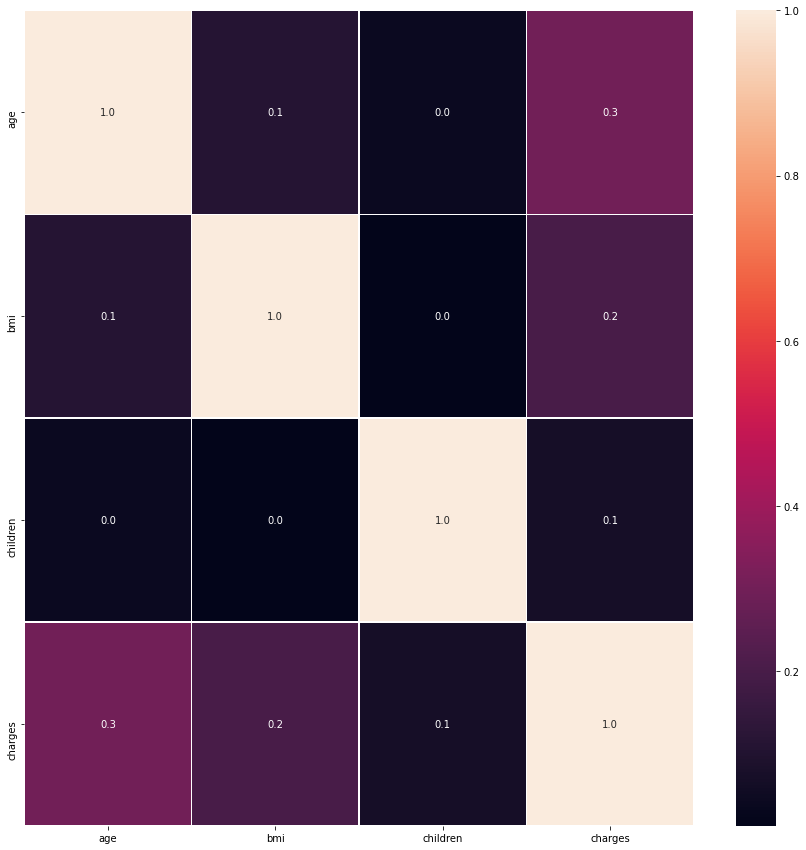

In [84]:
#heatmap to visualize the correlation between functions within the raw data. Numbers close to 1.0 will have a brighter colour.
f,ax = plt.subplots(figsize = (15,15))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)
plt.show()

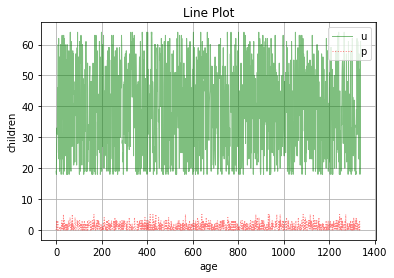

In [85]:
#
df.age.plot(kind='line', color='g', label='age', linewidth=1, alpha=0.5, grid=True, linestyle='-')
df.children.plot(kind='line', color='r', label='children', linewidth=1, alpha=0.5, grid=True, linestyle=':')
plt.legend('upper left')
plt.xlabel('age')
plt.ylabel('children')
plt.title('Line Plot')
plt.show()

In [86]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [87]:
df1=df['smoker']=='smoker'
df_smoker=df[df1]
df2=df['children']=='children'
df_children=df[df2]

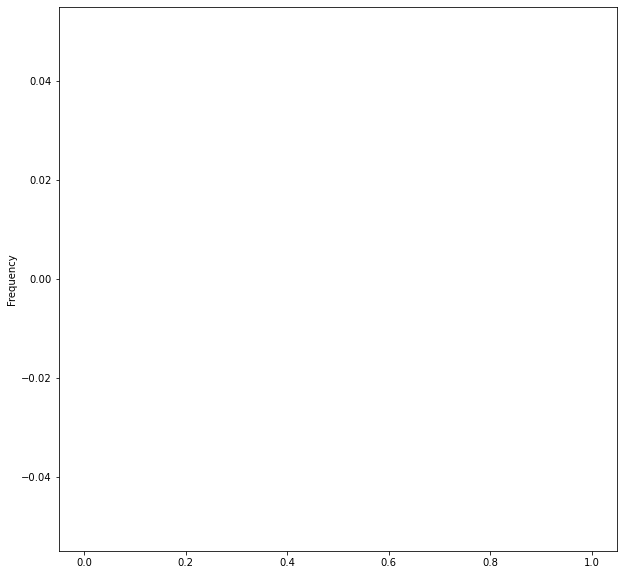

In [88]:
df_smoker.charges.plot(kind='hist', bins=50, figsize=(10,10))
plt.show()

In [89]:
df4=(df['sex']=='female') & (df['smoker']=='yes') & (df['children']>0)
df[df4]

,age,sex,bmi,children,smoker,region,charges
23,34,female,31.920,1,yes,northeast,37701.87680
58,53,female,22.880,1,yes,southeast,23244.79020
84,37,female,34.800,2,yes,southwest,39836.51900
94,64,female,31.300,2,yes,southwest,47291.05500
103,61,female,29.920,3,yes,southeast,30942.19180
...,...,...,...,...,...,...,...
1218,46,female,34.600,1,yes,southwest,41661.60200
1281,47,female,27.645,2,yes,northwest,24535.69855
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545


<AxesSubplot:title={'center':'age'}, xlabel='children'>

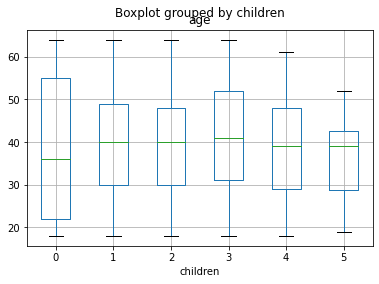

In [90]:
df.boxplot(column='age',by = 'children')

In [93]:
sns.countplot(data=df,y= 'BMI',
             palette = 'colorblind',
             order = df['BMI'].value_counts().index[:5],
             hue = 'Medical Cost per region').set_title("l")

KeyError: 'BMI'